In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
yellow_data = pd.read_csv("C:/Users/clark/OneDrive/Desktop/SQL Master Class for Data Analysis/yellow_tripdata_2019-12.csv", low_memory = False)
green_data = pd.read_csv("C:/Users/clark/OneDrive/Desktop/SQL Master Class for Data Analysis/green_tripdata_2019-12.csv", low_memory = False)
fhv_data = pd.read_csv("C:/Users/clark/OneDrive/Desktop/SQL Master Class for Data Analysis/fhv_tripdata_2019-12.csv", low_memory = False)
fhvhv_data = pd.read_csv("C:/Users/clark/OneDrive/Desktop/SQL Master Class for Data Analysis/fhvhv_tripdata_2019-12.csv", low_memory = False)

In [4]:
data_sets = [yellow_data, green_data, fhv_data, fhvhv_data]

In [5]:
print([info.shape for info in data_sets])

[(6896317, 18), (450627, 20), (1759399, 6), (22243149, 7)]


In [6]:
yellow_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.845299e+06,6.845299e+06,6.896317e+06,6.845299e+06,6.896317e+06,6.896317e+06,6.845299e+06,6.896317e+06,6.896317e+06,6.896317e+06,6.896317e+06,6.896317e+06,6.896317e+06,6.896317e+06,6.896317e+06
mean,1.666457e+00,1.550877e+00,2.973421e+00,1.065756e+00,1.636525e+02,1.614892e+02,1.298993e+00,1.359027e+01,1.108518e+00,4.924147e-01,2.244620e+00,3.881238e-01,2.979857e-01,1.964165e+01,2.275278e+00
std,4.714787e-01,1.174330e+00,1.643113e+01,9.309869e-01,6.605758e+01,7.033753e+01,4.879401e-01,1.522692e+02,1.259892e+00,7.233857e-02,2.875127e+00,1.715502e+00,3.381444e-02,1.525236e+02,7.359669e-01
min,1.000000e+00,0.000000e+00,-3.726453e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.472000e+03,-4.500000e+00,-5.000000e-01,-2.008000e+02,-4.050000e+01,-3.000000e-01,-1.472800e+03,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.250000e+02,1.120000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,1.920000e+00,0.000000e+00,3.000000e-01,1.480000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,3.030000e+00,1.000000e+00,2.330000e+02,2.340000e+02,2.000000e+00,1.543000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.135000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,1.913018e+04,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,3.984684e+05,9.006000e+01,3.300000e+00,4.044400e+02,6.126600e+02,3.000000e-01,3.984712e+05,3.000000e+00


In [7]:
green_data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,359902.000000,359902.000000,450627.000000,450627.000000,359902.000000,450627.000000,450627.000000,450627.000000,450627.000000,450627.000000,450627.000000,0.0,450625.000000,450627.000000,359902.000000,359900.000000,359900.000000
mean,1.833449,1.102836,107.480599,128.446118,1.311582,3.445025,15.586714,0.888232,0.439677,0.949459,0.289563,NaN,0.270599,18.736671,1.477002,1.023226,0.426469
std,0.372575,0.623131,70.625075,76.086904,0.968107,117.057614,12.915723,1.166764,0.166541,2.182414,1.369154,NaN,0.091492,14.405428,0.521520,0.150620,0.995450
min,1.000000,1.000000,1.000000,1.000000,0.000000,-9436.330000,-200.000000,-4.500000,-0.500000,-90.500000,0.000000,NaN,-0.300000,-200.000000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,52.000000,64.000000,1.000000,1.040000,7.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,8.800000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,82.000000,129.000000,1.000000,1.940000,11.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,14.150000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,166.000000,192.000000,1.000000,4.000000,20.500000,1.000000,0.500000,1.560000,0.000000,NaN,0.300000,24.420000,2.000000,1.000000,0.000000
max,2.000000,6.000000,265.000000,265.000000,9.000000,77843.760000,500.000000,8.250000,3.550000,441.000000,48.000000,NaN,0.300000,500.300000,5.000000,2.000000,2.750000


In [8]:
fhv_data.describe()

,PULocationID,DOLocationID,SR_Flag
count,1.759399e+06,1.759399e+06,0.0
mean,2.372111e+02,1.600476e+02,NaN
std,6.227865e+01,8.610043e+01,NaN
min,1.000000e+00,1.000000e+00,NaN
25%,2.640000e+02,7.700000e+01,NaN
50%,2.640000e+02,1.680000e+02,NaN
75%,2.640000e+02,2.470000e+02,NaN
max,2.650000e+02,2.650000e+02,NaN


In [9]:
fhvhv_data.describe()

,PULocationID,DOLocationID,SR_Flag
count,2.224315e+07,2.224315e+07,2895887.0
mean,1.387326e+02,1.412732e+02,1.0
std,7.509290e+01,7.749719e+01,0.0
min,1.000000e+00,1.000000e+00,1.0
25%,7.500000e+01,7.500000e+01,1.0
50%,1.400000e+02,1.410000e+02,1.0
75%,2.110000e+02,2.160000e+02,1.0
max,2.650000e+02,2.650000e+02,1.0


Interestingly enough, it looks like green cabs typically take less passengers and drive further distances; this ends with them having slightly more expensive fare charges. However, this doesn't translate to more tips, quite the opposite, it appears that they receive less tips if they receieve any tips at all. For both ride types increased fare amounts lead to increased tip percentages which is interesting. The question is, do customers feel the need to tip more because they feel guilty about the long ride, is there a specific of drivers making these longer rides, do the longer rides allow customers more interaction with the drivers and thus a stronger connection leading to a better tip, or something else entirely. There are also very large trip distances as well as negative trip distances which could represent faulty devices.


In [10]:
print(yellow_data.count())
print(green_data.count())
print(fhv_data.count())
print(fhvhv_data.count())

VendorID                 6845299
tpep_pickup_datetime     6896317
tpep_dropoff_datetime    6896317
passenger_count          6845299
trip_distance            6896317
RatecodeID               6845299
store_and_fwd_flag       6845299
PULocationID             6896317
DOLocationID             6896317
payment_type             6845299
fare_amount              6896317
extra                    6896317
mta_tax                  6896317
tip_amount               6896317
tolls_amount             6896317
improvement_surcharge    6896317
total_amount             6896317
congestion_surcharge     6896317
dtype: int64
VendorID                 359902
lpep_pickup_datetime     450627
lpep_dropoff_datetime    450627
store_and_fwd_flag       359902
RatecodeID               359902
PULocationID             450627
DOLocationID             450627
passenger_count          359902
trip_distance            450627
fare_amount              450627
extra                    450627
mta_tax                  450627
tip_amoun

In [11]:
print(pd.DataFrame(yellow_data.duplicated(), columns = ['tf']).groupby('tf')['tf'].count())
print(pd.DataFrame(green_data.duplicated(), columns = ['tf']).groupby('tf')['tf'].count())
print(pd.DataFrame(fhv_data.duplicated(), columns = ['tf']).groupby('tf')['tf'].count())
print(pd.DataFrame(fhvhv_data.duplicated(), columns = ['tf']).groupby('tf')['tf'].count())

tf
False    6896317
Name: tf, dtype: int64
tf
False    450626
True          1
Name: tf, dtype: int64
tf
False    1749331
True       10068
Name: tf, dtype: int64
tf
False    22242924
True          225
Name: tf, dtype: int64


There appears to only be about 18 missing data points and no duplicated data in the yellow cab data set. In this case we can simply delete the missing data points since they make up such a small amount of our total data. For the green data set though there is over 90,000 rows of missing data in certain columns. Thankfully passenger count, payment type, trip type are the only columns that are of concern, the others can be ingored or deleted entirely since they don't play a major role in any analysis we would perform. Since this is such a large subset of our data we probably wouldn't want to delete all of these rows. We could technically delete them and still have a large amount of data to work with but since there is little variation in the columns the empty cells can be filled with the averages for their respective columns. There is also only a singular duplicate in this data set which can be removed.

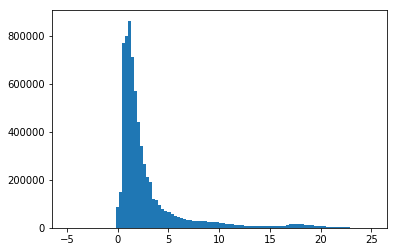

In [12]:
plt.hist(np.array(yellow_data['trip_distance']), bins = 100, range = [-5,25])
plt.show()

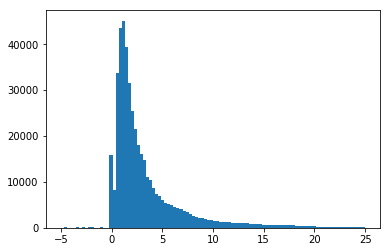

In [13]:
plt.hist(np.array(green_data['trip_distance']), bins = 100, range = [-5,25])
plt.show()

In [14]:
yellow_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [15]:
green_data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

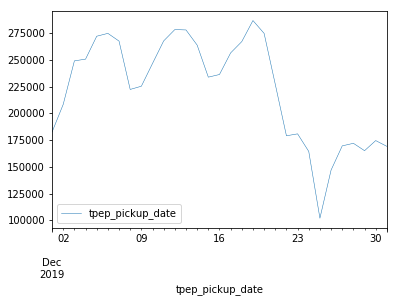

In [122]:
yellow_data['tpep_pickup_date'] = pd.to_datetime(yellow_data['tpep_pickup_datetime'])
yellow_data['tpep_pickup_date'] = yellow_data['tpep_pickup_date'].dt.normalize()
yellow_data.sort_values(by = ['tpep_pickup_date'], inplace = True)
yellow_date_data = yellow_data.groupby('tpep_pickup_date')['tpep_pickup_date'].count().to_frame()
yellow_date_data.loc['2019-12'].plot(linewidth = 0.5)

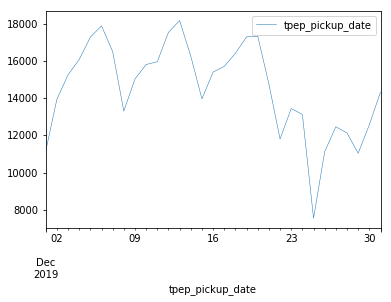

In [125]:
green_data['tpep_pickup_date'] = pd.to_datetime(green_data['lpep_pickup_datetime'])
green_data['tpep_pickup_date'] = green_data['tpep_pickup_date'].dt.normalize()
green_data.sort_values(by = ['tpep_pickup_date'], inplace = True)
green_date_data = green_data.groupby('tpep_pickup_date')['tpep_pickup_date'].count().to_frame()
green_date_data.loc['2019-12'].plot(linewidth = 0.5)

For both green and yellow cabs you can see the cyclical nature of the volume. The demand increases slowly throughout the week and peaks on Saturday before bottoming out on Sunday. This gets completely disrupted during the week of Christmas, with many customers traveling to be with their families and employees going on vacation there is a dip there. On top of that other customers have burned through a decent of their expendable income for the holidays we take another hit on that front.

Text(0, 0.5, 'Total Payments')

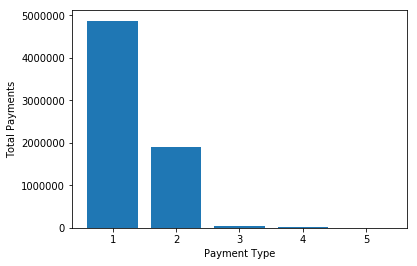

In [130]:
yellow_pay_data = yellow_data.groupby('payment_type')['payment_type'].count()
plt.bar(yellow_pay_data.index, yellow_pay_data.values)
plt.xlabel('Payment Type')
plt.ylabel('Total Payments')

Text(0, 0.5, 'Total Payments')

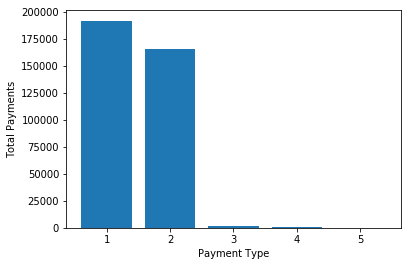

In [131]:
green_pay_data = green_data.groupby('payment_type')['payment_type'].count()
plt.bar(green_pay_data.index, green_pay_data.values)
plt.xlabel('Payment Type')
plt.ylabel('Total Payments')

In [ ]:
yellow_data[yellow_data['payment_type'] == 1]
green_data[green_data['payment_type'] == 1]

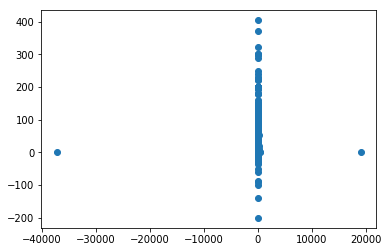

In [136]:
yellow_dist_data = yellow_data.loc[:,['trip_distance','tip_amount']]
yellow_dist_data = yellow_dist_data[yellow_dist_data['trip_distance'] < 10000]
yellow_dist_data = yellow_dist_data[yellow_dist_data['trip_distance'] > -10000]
plt.scatter(yellow_dist_data['trip_distance'],yellow_dist_data['tip_amount'])

In [ ]:
green_dist_data = green_data.loc[:,['trip_distance','tip_amount']]
green_dist_data[green_dist_data['trip_distance'] < 10000]
green_dist_data[green_dist_data['trip_distance'] > -10000]
plt.scatter(green_dist_data['trip_distance'],green_dist_data['tip_amount'])